# Electric Vehicle Analysis
This is an exploratory data analysis of the electric vehicles in the US. Data was sourced from the U.S. government website, Data.gov, https://data.gov/
Here is the link to the data set https://catalog.data.gov/dataset/electric-vehicle-population-data

## Data Import, Preview Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ev_pop = pd.read_csv("Electric_Vehicle_Population_Data.csv")
ev_pop.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


VIN (1-10) column has the vehicle identification number which is not of much benefit on our analysis so we will get rid of it. Among the columns we will drop include
* Postal Code
* Base MSRP
* Legislative District
* DOL Vehicle ID
* 2020 Census Tract

In [4]:
drop_columns = ["VIN (1-10)", "Postal Code", "Base MSRP", "Legislative District", "DOL Vehicle ID", "2020 Census Tract"]

ev_pop = ev_pop.drop(drop_columns, axis =1)

In [5]:
ev_pop.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,POINT (-120.6027202 46.5965625),PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC


In [6]:
ev_pop.shape

(150482, 11)

After getting rid of the 5 columns, our dataset now is composed of 150482 rows and 12 columns. Let's also check if there are rows with null values

In [7]:
na_col = ev_pop.isna().sum(axis=0)
na_col

County                                               3
City                                                 3
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Vehicle Location                                     7
Electric Utility                                     3
dtype: int64

Only a few columns columns have null values hence will not affect our analysis

In [8]:
ev_pop["State"].value_counts().head(10)

WA    150141
CA        92
VA        35
MD        33
TX        20
NC        13
IL        12
AZ        11
CO        11
FL         9
Name: State, dtype: int64

In the results of the above code, we can see that 99 percent of the data are from Washington (WA) state, so let's filter out other states

In [9]:
ev_pop_wa = ev_pop[ev_pop["State"] == "WA"]
ev_pop_wa.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,POINT (-120.6027202 46.5965625),PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC


## Analysis

### Electric Vehicle Types

We will start our analysis by taking a look at the electric vehicle types

In [10]:
ev_pop_wa["Electric Vehicle Type"].value_counts()

Battery Electric Vehicle (BEV)            116585
Plug-in Hybrid Electric Vehicle (PHEV)     33556
Name: Electric Vehicle Type, dtype: int64

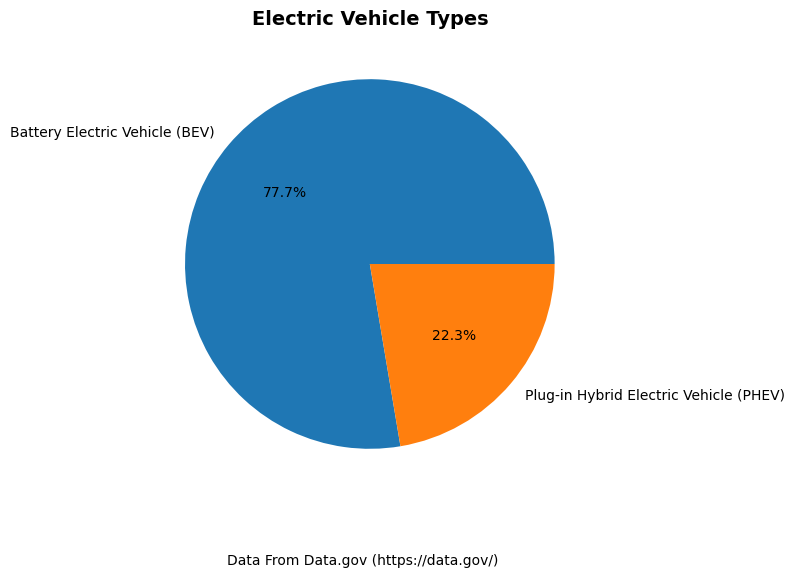

In [11]:
type_counts = ev_pop_wa['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(6, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Electric Vehicle Types', fontweight='bold', fontsize=14)
plt.ylabel('')

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

There are about 116585 battery electric vehicles (BEVs) and 33556 plug-in hybrid electric vehicles (PHEVs), this can be axpressed as roughly 77% and 22% respectively. BEVs are fully electric vehicles and are powered solely by electricity stored in large batteries. PHEVs on the other hand  have both an internal combustion engine (usually gasoline) and an electric motor. They can operate on electric power alone, gasoline power alone, or a combination of both.

### Top 20 EV Makes

In [12]:
ev_pop_wa["Make"].value_counts()

TESLA                   68821
NISSAN                  13481
CHEVROLET               12004
FORD                     7592
BMW                      6426
KIA                      6187
TOYOTA                   5196
VOLKSWAGEN               4064
VOLVO                    3529
JEEP                     3283
HYUNDAI                  3165
AUDI                     2998
CHRYSLER                 2626
RIVIAN                   2482
MERCEDES-BENZ            1053
PORSCHE                  1027
MITSUBISHI                848
HONDA                     808
FIAT                      806
MINI                      791
POLESTAR                  763
SUBARU                    622
SMART                     274
LINCOLN                   228
JAGUAR                    228
LUCID                     190
CADILLAC                  175
LEXUS                     138
MAZDA                     136
GENESIS                   107
LAND ROVER                 46
FISKER                     16
ALFA ROMEO                 12
AZURE DYNA

This dataset has over 40 car makes, we will just have a look at the top 20. Tesla comes first in the list folowed by Nissan, Chevrolet and so on 

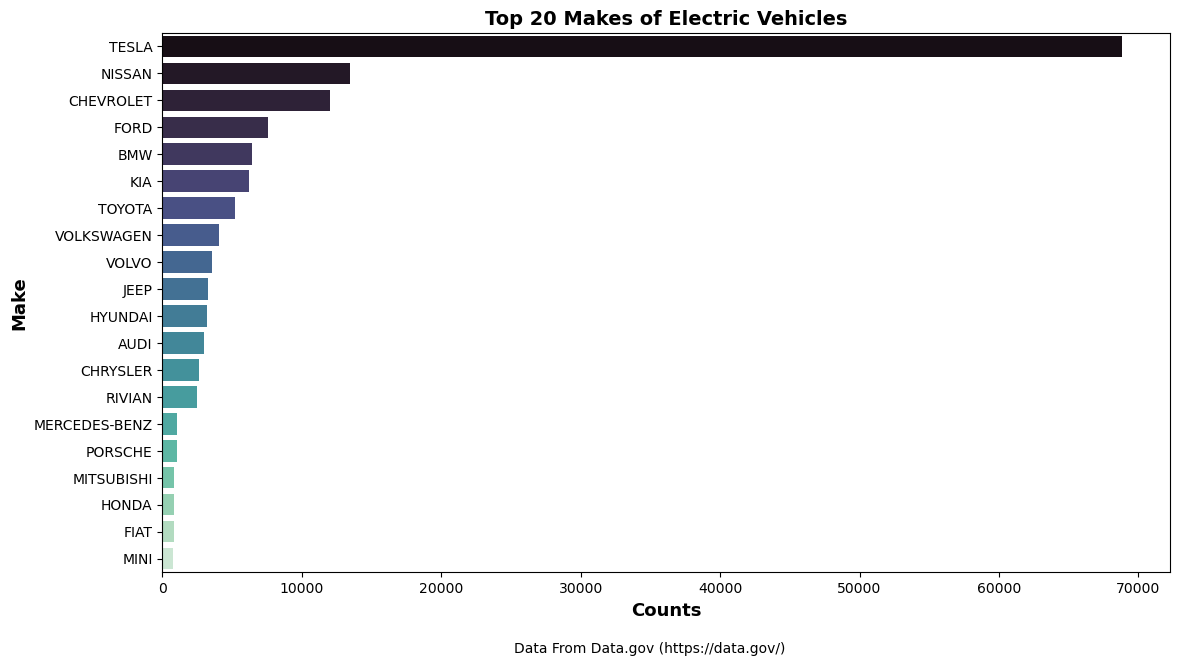

In [13]:
make_counts = ev_pop_wa['Make'].value_counts().nlargest(20)

plt.figure(figsize=(13, 7))
sns.barplot(x=make_counts.values, y=make_counts.index, palette="mako")
plt.title('Top 20 Makes of Electric Vehicles', fontweight='bold', fontsize=14)
plt.xlabel('Counts', fontweight='bold', fontsize=13)
plt.ylabel('Make', fontweight='bold', fontsize=13)

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

For a further analysis, we shall filter our data to contain only the top 10 vehicle makes i.e Tesla,  Nissan, Chevrolet, Ford, BMW, KIA, Toyota, Volkswagen, Volvo, and Jeep

### Counts Of The Top 10 Makes According To Their EV Types With 

In [14]:
top_makes = ["TESLA", "NISSAN", "CHEVROLET", "FORD", "BMW", "KIA", "TOYOTA", "VOLKSWAGEN", "VOLVO", "JEEP"]

make_evtype = ev_pop_wa[ev_pop_wa["Make"].isin(top_makes)]

top_make_evtype = make_evtype.groupby(["Electric Vehicle Type", "Make"]).size().reset_index(name="Count")

top_make_evtype


,Electric Vehicle Type,Make,Count
0,Battery Electric Vehicle (BEV),BMW,1793
1,Battery Electric Vehicle (BEV),CHEVROLET,7128
2,Battery Electric Vehicle (BEV),FORD,3902
3,Battery Electric Vehicle (BEV),KIA,4144
4,Battery Electric Vehicle (BEV),NISSAN,13481
5,Battery Electric Vehicle (BEV),TESLA,68821
6,Battery Electric Vehicle (BEV),TOYOTA,188
7,Battery Electric Vehicle (BEV),VOLKSWAGEN,4064
8,Battery Electric Vehicle (BEV),VOLVO,1181
9,Plug-in Hybrid Electric Vehicle (PHEV),BMW,4633


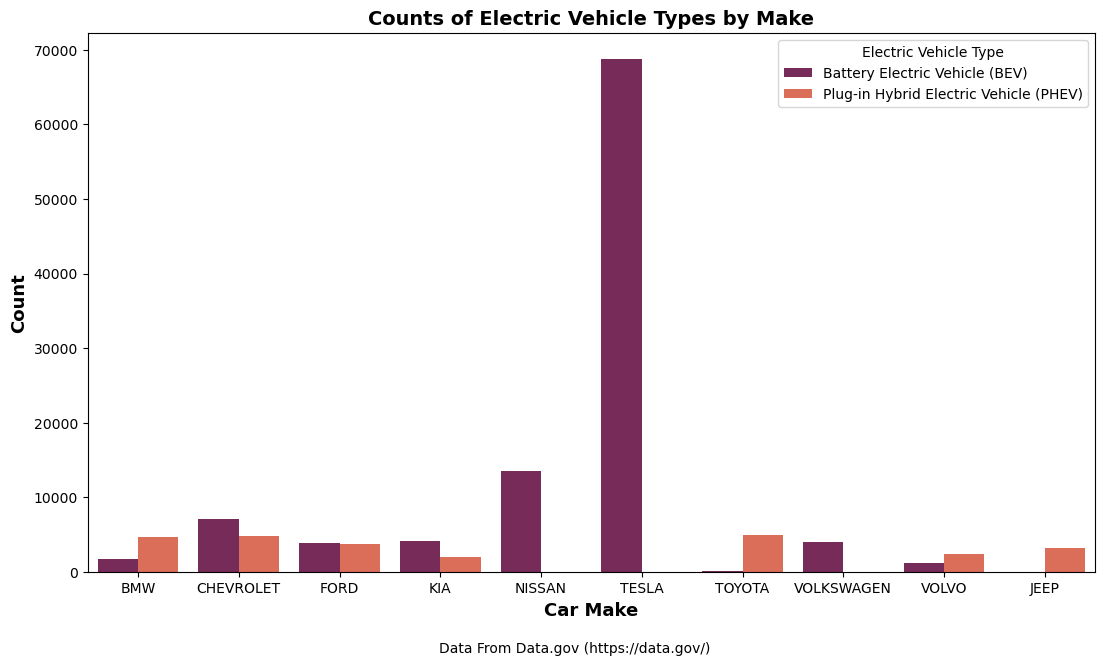

In [15]:
plt.figure(figsize = (13,7))
sns.barplot(data=top_make_evtype, x="Make", y="Count", hue="Electric Vehicle Type", palette="rocket")
plt.xlabel("Car Make", fontsize=13, fontweight="bold")
plt.ylabel("Count", fontsize=13, fontweight="bold")
plt.title("Counts of Electric Vehicle Types by Make", fontsize=14, fontweight="bold")
plt.legend(title='Electric Vehicle Type', loc="upper right")

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

From the above visualization, you can conclude the folowing about the electric cars in Washington state:
* There are only battery electric vehicles by Tesla, Nissan and Volkswagen.
* Jeeps on the other hand are only plug-in hybrid, whereas in the case of Toyota, there are more hybrids that only electric one.
* For the remaining 5 makes, i.e Chevrolet, Ford, BMW, KIA and Volvo, there are almost same number of each vehicle type.

### Top 20 Models

Let us even go deeper and do a make a head to head comparison of the car models instead of makes

In [18]:
ev_pop_wa["Make & Model"] = ev_pop_wa.loc[:,"Make"] + " " + ev_pop_wa.loc[:,"Model"]

model_counts = ev_pop_wa["Make & Model"].value_counts()[:20]


model_counts

C:\Users\Ismael\AppData\Local\Temp\ipykernel_9240\699878748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_pop_wa["Make & Model"] = ev_pop_wa.loc[:,"Make"] + " " + ev_pop_wa.loc[:,"Model"]


TESLA MODEL Y          28456
TESLA MODEL 3          27626
NISSAN LEAF            13171
TESLA MODEL S           7592
CHEVROLET BOLT EV       5727
TESLA MODEL X           5101
CHEVROLET VOLT          4876
VOLKSWAGEN ID.4         2991
KIA NIRO                2869
CHRYSLER PACIFICA       2626
JEEP WRANGLER           2622
FORD MUSTANG MACH-E     2615
TOYOTA PRIUS PRIME      2520
BMW X5                  2063
BMW I3                  1917
FORD FUSION             1816
KIA EV6                 1644
HYUNDAI IONIQ 5         1638
FORD C-MAX              1543
TOYOTA RAV4 PRIME       1512
Name: Make & Model, dtype: int64

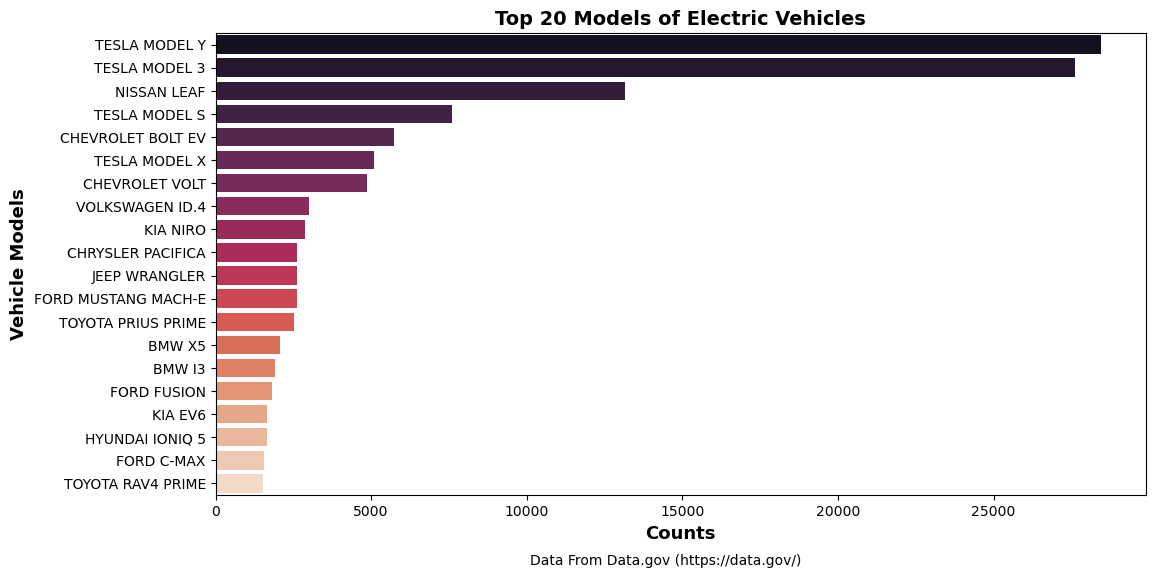

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=model_counts.values, y=model_counts.index, palette="rocket")
plt.title("Top 20 Models of Electric Vehicles", fontweight='bold', fontsize =14)
plt.xlabel("Counts", fontsize=13, fontweight="bold")
plt.ylabel("Vehicle Models", fontsize=13, fontweight="bold")

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

In the above visualization, we can conclude that there are 4 Tesla models in the top 20 category, Tesla's  Model Y and Model 3 being at the top of the list. 

### Clean Alternative Fuel Vehicle Eligibility

In [20]:
cavf = ev_pop_wa["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()
cavf

Eligibility unknown as battery range has not been researched    69581
Clean Alternative Fuel Vehicle Eligible                         62793
Not eligible due to low battery range                           17767
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

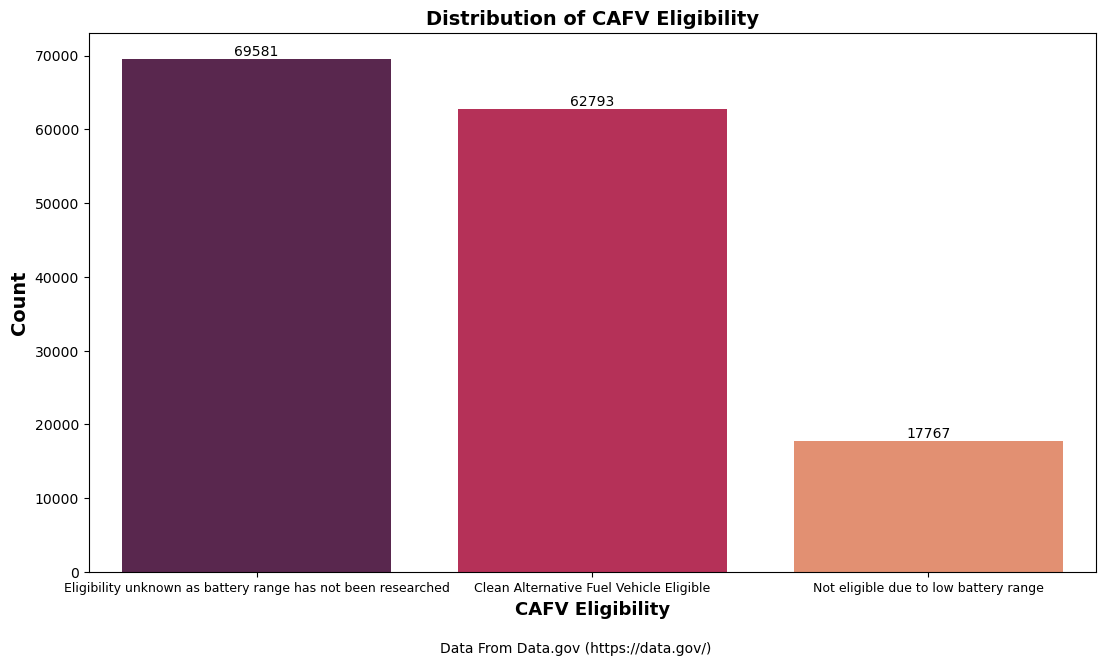

In [21]:
plt.figure(figsize=(13, 7))

sns.barplot(x=cavf.index, y=cavf.values, palette="rocket")
plt.xlabel('CAFV Eligibility', fontsize=13, fontweight="bold")
plt.ylabel('Count', fontsize=14, fontweight="bold")
plt.title('Distribution of CAFV Eligibility', fontsize=14, fontweight='bold')
plt.xticks(fontsize=9)

for i, v in enumerate(cavf.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()


When it comes to clean alternative fuel vehicle (CAFV) eligibility category: 
* About 46% of cars in Washington have their eligibility unkown as battery range has not been researched
* About 41 percent of total cars are CAFV eligible
* Close to 12 percent of total cars are not eligible due to low battery range

### Counties With The Most EV Vehicles 
In our next analysis, we shall take a glance at only the top 20 counties

In [22]:
top_20_counties = ev_pop_wa["County"].value_counts().nlargest(20).reset_index()
top_20_counties.columns = ["County", "Counts"]
top_20_counties

,County,Counts
0,King,79075
1,Snohomish,17307
2,Pierce,11542
3,Clark,8849
4,Thurston,5403
5,Kitsap,4923
6,Spokane,3690
7,Whatcom,3668
8,Benton,1800
9,Skagit,1658


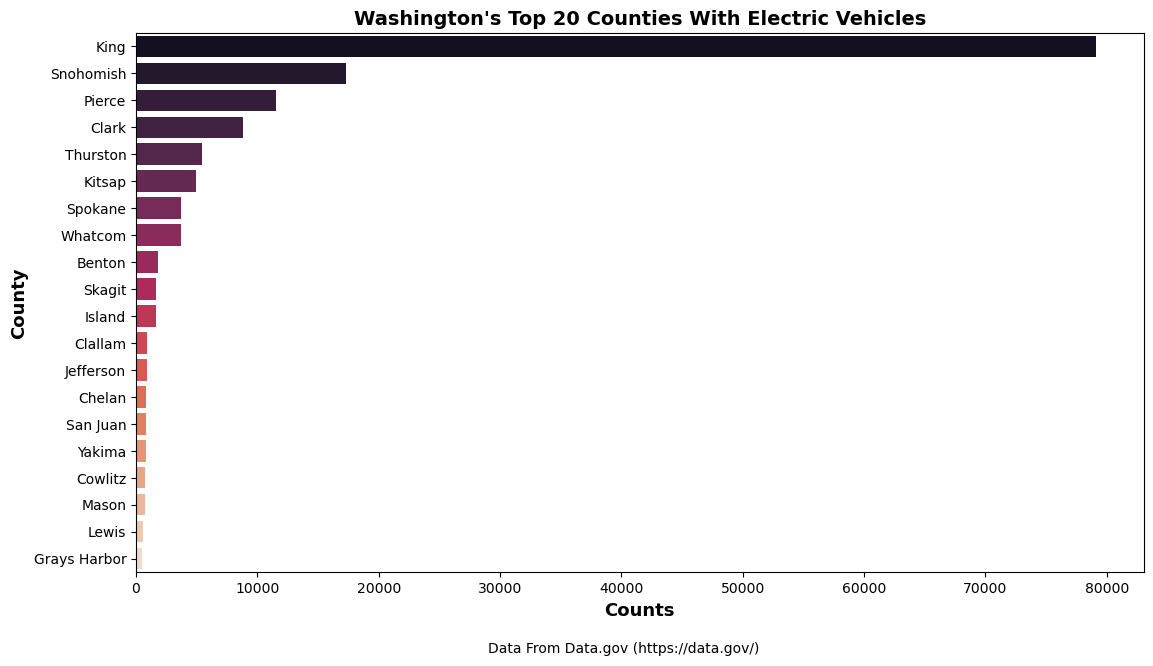

In [24]:
plt.figure(figsize=(13,7))
sns.barplot(x=top_20_counties.Counts, y=top_20_counties.County, palette="rocket")
plt.xlabel("Counts", fontweight="bold", fontsize=13)
plt.ylabel("County", fontweight="bold", fontsize=13)
plt.title("Washington's Top 20 Counties With Electric Vehicles", fontweight="bold", fontsize=14)

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

King County has close to 8000 electric vehicles, this can be directrly attributed to various policies and incentives implemented to promote electric vehicle adoption. These include tax incentives, rebates, and access to carpool lanes for EVs, making it more appealing for residents to switch to electric transportation.

#### Top 5 Counties Vs The Top 5 EV Makes

Earlier on, we had noted that Tesla, Nissan, Chevrolet, Ford and BMW are at the top 5 electric car models overally. We have also seen above that King, Snohomish, Pierce, Clark, and Thurston are the top 5 counties in Washington which has high number of electric vehicles. With this, lets take a look at how many individual car makes are there in each of the said cities. 

In [25]:
counties = ["King", "Snohomish", "Pierce", "Clark", "Thurston"]
makes1 = ["TESLA", "NISSAN", "CHEVROLET", "FORD", "BMW"]

county_makes = ev_pop_wa[(ev_pop_wa["County"].isin(counties) & ev_pop_wa["Make"].isin(makes1))]
top5_county_makes = county_makes.groupby(["County", "Make"]).size().reset_index(name="Count")

top5_county_makes


,County,Make,Count
0,Clark,BMW,347
1,Clark,CHEVROLET,781
2,Clark,FORD,530
3,Clark,NISSAN,803
4,Clark,TESLA,3605
5,King,BMW,3805
6,King,CHEVROLET,4888
7,King,FORD,2897
8,King,NISSAN,6590
9,King,TESLA,39519


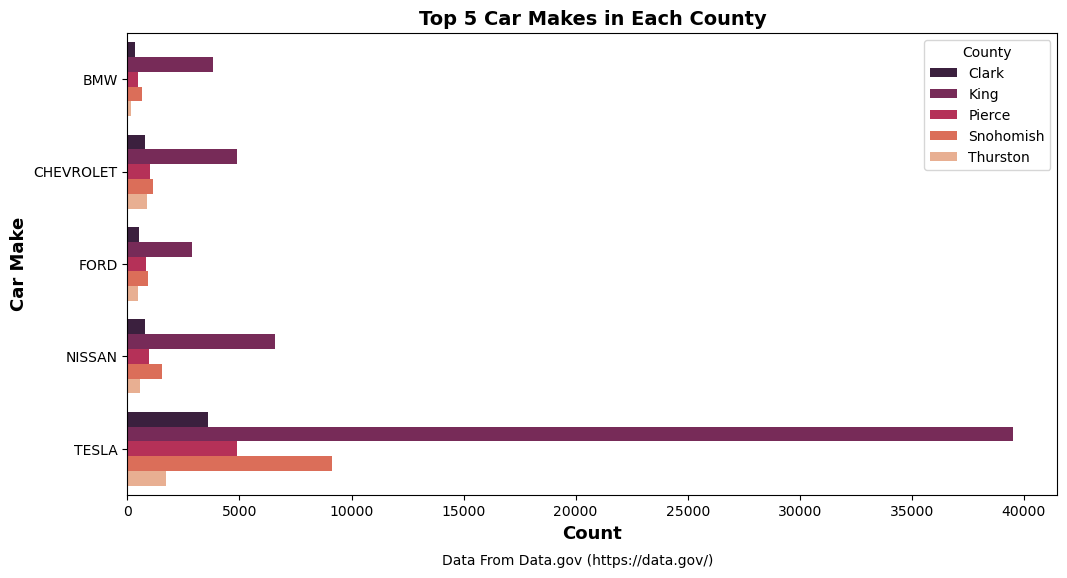

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_county_makes, x="Count", y="Make", hue="County", palette="rocket")
plt.xlabel("Count", fontweight="bold", fontsize=13)
plt.ylabel("Car Make", fontweight="bold", fontsize=13)
plt.title("Top 5 Car Makes in Each County", fontweight="bold", fontsize=14)
plt.legend(title='County')

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()


In the above visualization, we can conclude that King County has the highest number of the top five electric vehicles. There are also many Teslas in this county than any other car make. Tesla vehicles are expensinve and since King County is the most wealthy county in Washington, this explains the reason behind the large number of this specific car make

### Electric Vehicles Versus Their Years Of Model: 2012 To 2022
Now let's check which vehicle model year are common. Since the year 2023 is not yet over, we will filter it out although in the data below, we can see that this is the year with the highest electric car models. From the 1997 all teh way to 2011, there were fewer car modelled in this period and we can conclude that from 2012 is the electric vehicles era.

In [27]:
ev_pop_wa["Model Year"].value_counts()

2023    37052
2022    27734
2021    18610
2018    14407
2020    11263
2019    10693
2017     8552
2016     5632
2015     4919
2013     4555
2014     3598
2012     1630
2011      795
2024      642
2010       24
2008       18
2000        8
1999        4
2002        2
1998        1
2003        1
1997        1
Name: Model Year, dtype: int64

In [28]:
yr_12_22 = ev_pop_wa[(ev_pop_wa["Model Year"] >=2012) & (ev_pop_wa["Model Year"] <= 2022)]

yr_12_22["Model Year"].describe()

count    111593.000000
mean       2019.061581
std           2.754523
min        2012.000000
25%        2017.000000
50%        2020.000000
75%        2021.000000
max        2022.000000
Name: Model Year, dtype: float64

In [29]:
yr_counts = yr_12_22["Model Year"].value_counts()
yr_counts

2022    27734
2021    18610
2018    14407
2020    11263
2019    10693
2017     8552
2016     5632
2015     4919
2013     4555
2014     3598
2012     1630
Name: Model Year, dtype: int64

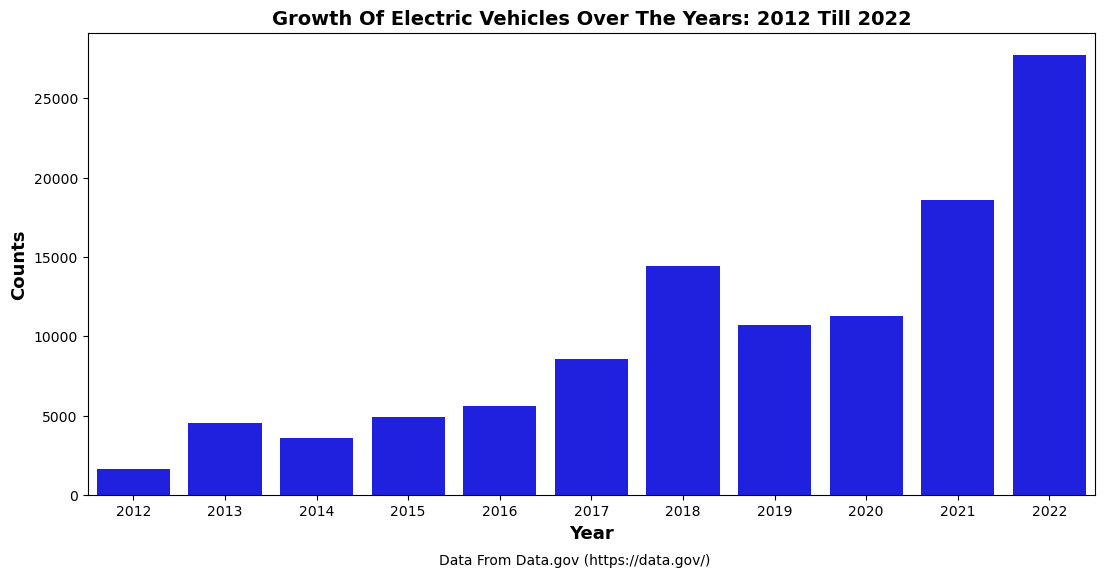

In [30]:
custom_palette= ["blue"]

plt.figure(figsize=(13,6))
sns.barplot(x=yr_counts.index, y=yr_counts.values, palette=custom_palette)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.ylabel("Counts", fontweight="bold", fontsize=13)
plt.title("Growth Of Electric Vehicles Over The Years: 2012 Till 2022", fontweight="bold", fontsize=14)

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)
    
plt.show()


From the above visualization, we can clearly see that electric vehicles industry has been on an uptrend. This could be due to technological innovations or the climate change campaigns advocating for less carbon emmisions. In the years 2019 and 2020, this growth stagnated a bit before shooting up in the preceeding years. 

### Electric Vehicle Types And Thier Years Of Model

Since it seems the second and the third decades of the 21st century are the electric vehicles era, we can make a head to head comparison between the fully electric and hybrid cars 

In [31]:
year_ev_type = yr_12_22.groupby(["Electric Vehicle Type", "Model Year"]).size().reset_index(name="Count")

year_ev_type

,Electric Vehicle Type,Model Year,Count
0,Battery Electric Vehicle (BEV),2012,776
1,Battery Electric Vehicle (BEV),2013,2922
2,Battery Electric Vehicle (BEV),2014,1792
3,Battery Electric Vehicle (BEV),2015,3617
4,Battery Electric Vehicle (BEV),2016,3855
5,Battery Electric Vehicle (BEV),2017,4456
6,Battery Electric Vehicle (BEV),2018,10023
7,Battery Electric Vehicle (BEV),2019,8755
8,Battery Electric Vehicle (BEV),2020,9595
9,Battery Electric Vehicle (BEV),2021,14945


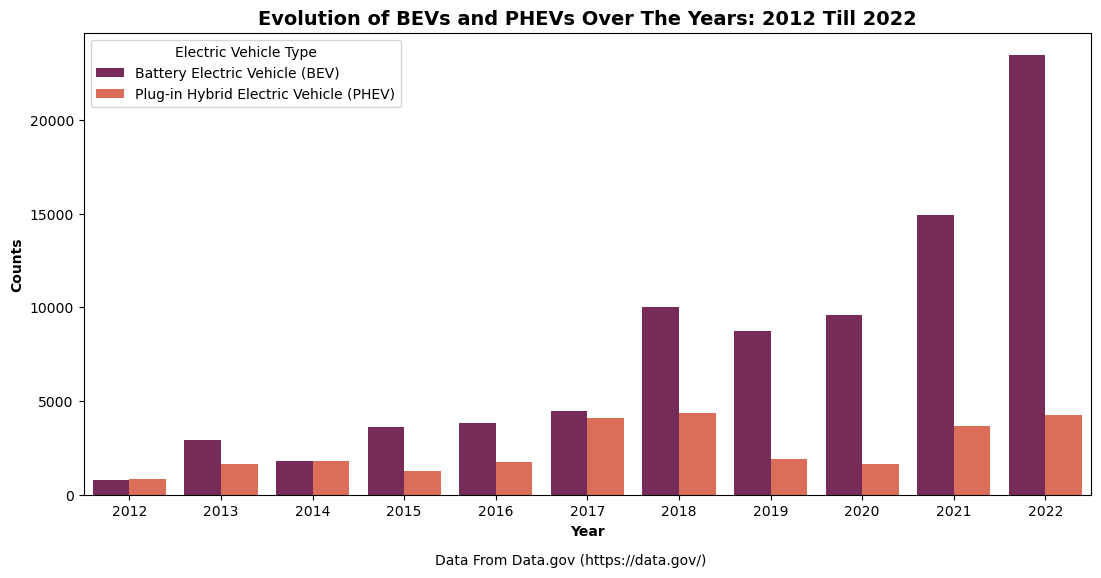

In [32]:
plt.figure(figsize=(13,6))
sns.barplot(data=year_ev_type, x="Model Year", y="Count", hue="Electric Vehicle Type", palette="rocket")
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Counts",fontweight="bold")
plt.title("Evolution of BEVs and PHEVs Over The Years: 2012 Till 2022", fontsize=14, fontweight="bold")

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

In the graph above, we can observe that in the years 2012 till 2022, hybrid, better known as  Plug-in Hybrid Electric Vehicles (PHEV), have been on somewhat like a stagnant growth. On the other hand, the fully elecrtic ones, Battery Electric Vehicles (BEV), has been doing really well with the highest growth witnessed in the models of the year 2022. Due to climate change implemantation plans and campaigns for electric vehicles, this growth is expected to even skyrocket in the remaining part of this third decade.

### Top 3 EVs Vs Their Year Of Model
Ealier on we had witnessed that Tesla, Nissan and Volkswagen are the top electric car makes, we can see do a brief analysis of how each car make, and electric vehicle type have been perfoming in the said period, 2012 to 2022.

In [33]:
bev_makes = ["TESLA", "NISSAN", "VOLKSWAGEN"]

yr_bev_makes = yr_12_22[(yr_12_22["Make"].isin(bev_makes)) & (yr_12_22["Electric Vehicle Type"] =="Battery Electric Vehicle (BEV)")]

In [34]:
yr_bev_makes_1 = yr_bev_makes.groupby(["Make", "Model Year"]).size().reset_index(name="Counts")
yr_bev_makes_1

,Make,Model Year,Counts
0,NISSAN,2012,575
1,NISSAN,2013,1927
2,NISSAN,2014,653
3,NISSAN,2015,1831
4,NISSAN,2016,1162
5,NISSAN,2017,917
6,NISSAN,2018,1219
7,NISSAN,2019,1394
8,NISSAN,2020,670
9,NISSAN,2021,548


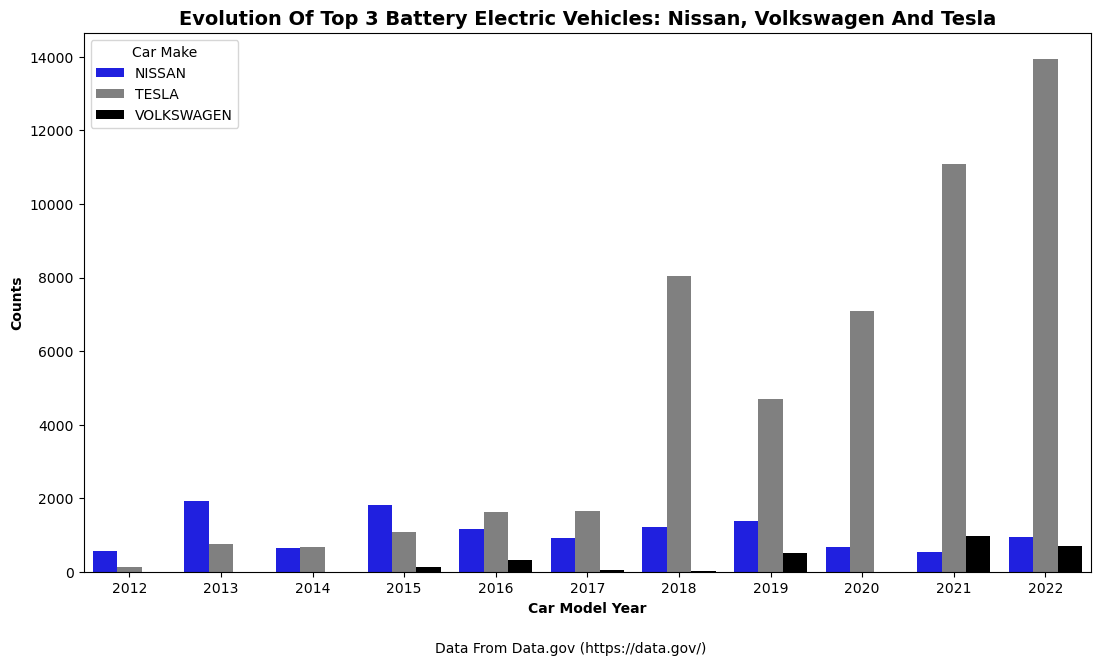

In [35]:
palette_1= ["blue", "grey", "black"]

plt.figure(figsize=(13,7))
sns.barplot(data=yr_bev_makes_1, x="Model Year", y="Counts", hue="Make", palette=palette_1)
plt.ylabel("Counts", fontweight="bold")
plt.xlabel("Car Model Year", fontweight="bold")
plt.title("Evolution Of Top 3 Battery Electric Vehicles: Nissan, Volkswagen And Tesla", fontsize=14, fontweight="bold")
plt.legend(title="Car Make", loc="upper left")

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()

In the visualization above, we can see in Washington, for every model year from 2012, the number of Teslas has are rising. 
Although Volkswagen had their first electric car in 2013, it became first popular in Washington on 2015.

### Tesla Models Versus Year Of Mode

In [37]:
yr_tesla = yr_12_22[(yr_12_22["Make"] == "TESLA")]
yr_tesla.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location,Electric Utility,Make & Model
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA MODEL 3
5,Snohomish,Marysville,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,TESLA MODEL 3
7,King,Woodinville,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA MODEL Y
8,Island,Coupeville,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,TESLA MODEL 3
10,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,POINT (-122.20264 47.6785),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA MODEL 3


In [38]:
yr_tesla_count = yr_tesla.groupby(["Model", "Model Year"]).size().reset_index(name="Counts")
yr_tesla_count

,Model,Model Year,Counts
0,MODEL 3,2017,68
1,MODEL 3,2018,6226
2,MODEL 3,2019,4026
3,MODEL 3,2020,3736
4,MODEL 3,2021,3804
5,MODEL 3,2022,4932
6,MODEL S,2012,134
7,MODEL S,2013,772
8,MODEL S,2014,666
9,MODEL S,2015,1091


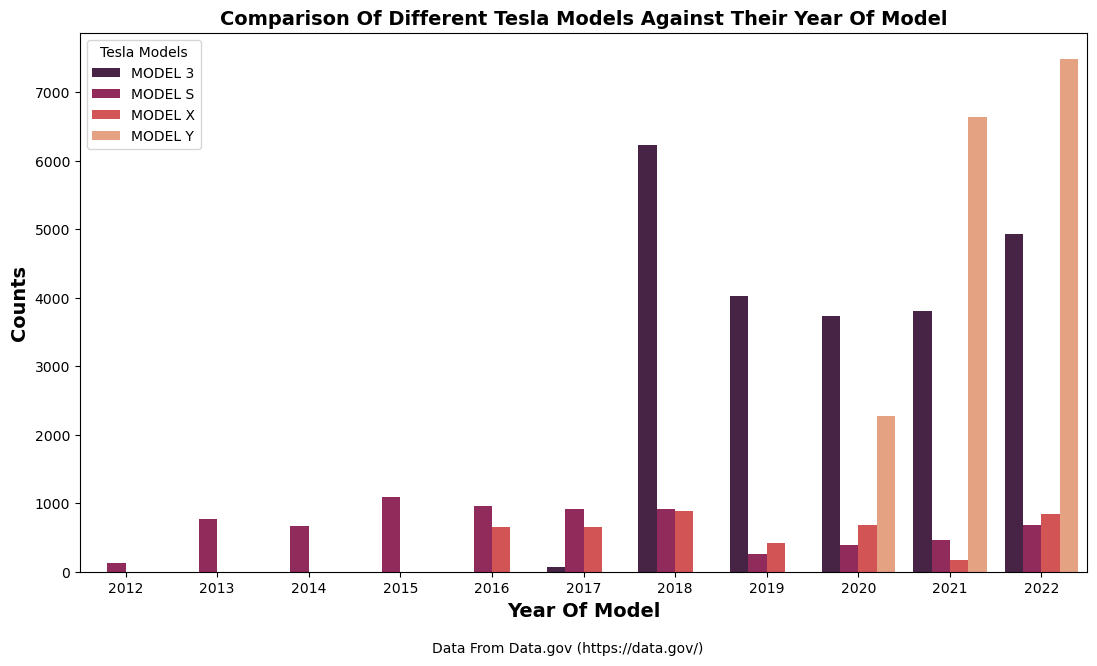

In [39]:
plt.figure(figsize=(13, 7))
sns.barplot(data= yr_tesla_count, x="Model Year", y="Counts", hue="Model", palette="rocket")
plt.xlabel("Year Of Model", fontweight="bold", fontsize="14")
plt.ylabel("Counts", fontweight="bold", fontsize="14")
plt.title("Comparison Of Different Tesla Models Against Their Year Of Model", fontweight="bold", fontsize="14")
plt.legend(title="Tesla Models", loc="upper left")

plt.text(.5, 0, "Data From Data.gov (https://data.gov/)", ha="center", va="center", transform=plt.gcf().transFigure)

plt.show()